# 資料匯入

In [104]:
import pandas as pd

df = pd.read_csv('iris.csv', encoding='big5')
df.head()

,花萼長度,花萼寬度,花瓣長度,花瓣寬度,屬種
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [105]:
print(df.shape)

(150, 5)


## 資料切分

In [115]:
from sklearn.model_selection import train_test_split

X = df[['花萼長度', '花萼寬度','花瓣長度','花瓣寬度']]
y = df['屬種']
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.3)
print(X_train.shape)
print(y_train.shape)

(105, 4)
(105,)


## 標準化

In [116]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# KNN Classifier

In [117]:
from sklearn.neighbors import KNeighborsClassifier

knnc = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knnc.fit(X_train_std, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

## 準確度 & 混淆矩陣

In [118]:
from sklearn import metrics
print(metrics.classification_report(y_test, knnc.predict(X_test_std)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      0.93      0.97        15
Iris-versicolor       0.87      0.93      0.90        14
 Iris-virginica       0.94      0.94      0.94        16

      micro avg       0.93      0.93      0.93        45
      macro avg       0.93      0.93      0.93        45
   weighted avg       0.94      0.93      0.93        45



In [119]:
cm = metrics.confusion_matrix(y_test, knnc.predict(X_test_std), 
                               labels=['Iris-setosa',
                               'Iris-versicolor',
                               'Iris-virginica'])
print(cm)

[[14  1  0]
 [ 0 13  1]
 [ 0  1 15]]


## 視覺化混淆矩陣

In [120]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.title('Confusion matrix')
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    for i in range(len(cm)):
        for j in range(len(cm)):
            plt.text(j,i, cm[i,j])

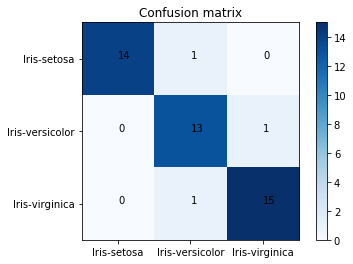

In [121]:
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
plot_confusion_matrix(cm, target_names)